# Assignment 2-1. Topic: Neural Network by implementing it yourself: 4 points

In this assignment, create your **own neural network** using only the Core Python 3.x and *NumPy* library.

Coordinate pairs have been defined in the assignment, and they are used to draw points of two colors (red and blue).
The ultimate goal is to create a neural network that knows how to place a point in the red or blue areas of the coordinate system.

When a new point is drawn on the graph and the coordinates of the point are fed to the neural network,
the neural network predicts the color of the point and the probability that it is that color.

The meaning of the assignment: to better understand the functioning of the neural network algorithm.

The steps of the assignment are:

1. Create training data with coordinate points with colors.
2. Create a neural network class with the structure:
* Input layer with two neurons (x, y) i.e., the coordinate pairs for the (x, y) point.
* One hidden layer with six (6) neurons and sigmoid as activation function.
* Output layer with one neuron and sigmoid as activation function.
* The result of the output layer is therefore a float between [0, 1].
3. Create functions to calculate the neural network's prediction for the input data (*forwardpropagation*) and
   update the connection weight values with the error (*backpropagation*).
4. Feed the training data 1000 times through the neural network.
* In each epoch round, feed the training data row by row through the neural network and update the weight values.
* During the round, save the errors for each input, and add the average of the round's loss to the list. Draw a graph of how the loss changes during training epochs.
5. Predict with a neural network (float value) what color the point will be: `[0.5, 8.7]`. How accurate do you think this prediction is?
6. Predict with a neural network (float value) what color the point is: `[15, -15]`. How accurate do you think this prediction is?
7. Find out how the change in the `learning_rate` argument of the `backpropagation()` method affects the (try values from `0.01` to `0.001`) result?
8. Find out how changing the `n_samples` property of `make_blobs()` affects the result?
9. Find out how changing the `cluster_std` property of `make_blobs()` affects the result?

Tips:
* Draw the structure of this neural network with a drawing program or on paper, where you can see the number of connections in each layer.
* Use the existing solution, and add to it only the necessary calculations for each layer of neural network.

Once the error (loss) function is defined, the _gradient descent_ method is used to minimize it.
In it, the gradient of the error function is calculated in relation to the weighting coefficients, and
it moves step by step to the opposite direction with respect to the gradient until an optimum is found.

### What do you need to implement in this assignment?

* `class NeuralNetwork` - ready-to-use class, i.e., no changes needed
* `train_neural_network()` - ready to use, trains the neural network and saves the loss after each round
* `create_dots_and_labels()` - requires also own implementation
 * plot the losses of the neural network
*  calculate the neural network prediction for the input `[x, y]` in the given variable.

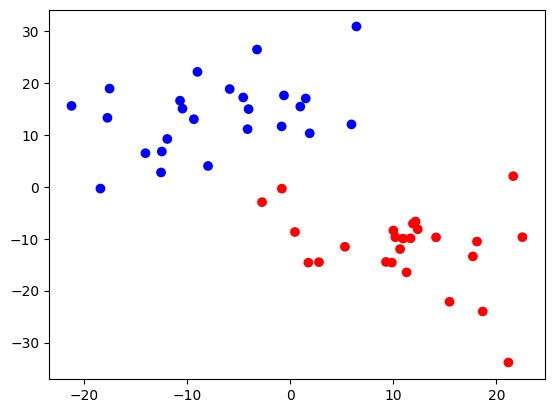

In [18]:
# This assignment uses the make_blobs() function, which can be used to draw the test dataset

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
colors = ['red' if label == 0 else 'blue' for label in labels]
plt.scatter(dots[:, 0], dots[:, 1], color=colors)

In [19]:
# `NeuralNetwork` is a ready-to-use class as is.
import numpy as np
class NeuralNetwork:
    def __init__(self):
        self.weights1 = np.random.rand(2, 6)
        self.weights2 = np.random.rand(6, 1)

    def __init__(self, input_neurons, hidden_neurons):
        self.weights1 = np.random.rand(input_neurons, hidden_neurons)
        self.weights2 = np.random.rand(hidden_neurons, 1)

    # Loss function
    def loss_function(self, true, prediction):
        return 0.5 * (true - prediction) ** 2

    # Derivative of the loss function
    def loss_function_derivative(self, true, prediction):
        return true - prediction

    # Sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivative of the sigmoid
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Traversal of the neural network
    def forwardpropagation(self, X, y):
        self.X = X
        self.y = y
        self.layer1 = self.sigmoid(np.dot(self.X, self.weights1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2))

        # the loss is calculated, i.e., the distance of the neural network's predictions from the correct values
        self.loss = self.loss_function(self.y, self.output)

    # Update weight values using the backpropagation method
    def backpropagation(self, learning_rate):
        output_error = self.loss_function_derivative(self.y, self.output)
        output_delta = output_error * self.sigmoid_derivative(self.output)
        weights2_adjustment = np.dot(self.layer1.T, output_delta)
        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        weights1_adjustment = np.dot(self.X.T, layer1_delta)

        self.weights1 += learning_rate * weights1_adjustment
        self.weights2 += learning_rate * weights2_adjustment


Implement function `create_dots_and_labels()`, that creates the dots and labels and set the RGB color for the dot based on the labels.

You must do the following:
* Create a color table where the color is `[label: 0: "red" or 1: "blue"]`
* Find out how `make_blobs()` works.

`train_neural_network()`: Trains the neural network and saves the loss after each epoch round

see **TODO** items that require you to write your own code.

In [20]:
# TODO: create_dots_and_labels() function should return list with `[dots, labels, colors]`
def create_dots_and_labels():
    # TODO: Find out how increasing the cluster_std property of make_blobs() affects the result?
    # ANSWER: It increases the deviation of single dot from the center of the cluster. The bigger the number, the more spread the dots are.
    dots, labels = make_blobs(n_samples=50, centers=2, cluster_std=8, center_box=(-20, 20), random_state=151)
    colors = ['red' if label == 0 else 'blue' for label in labels]
    return [dots, labels, colors]


# Train the neural network and save the loss after each epoch round (this has been already implemented)
def train_neural_network(ntwrk, train_X, train_y):
    losses_arr = []  # save round errors
    epochs = 1000
    for epoch in range(epochs):
        batch_losses = []
        # Let's go through each pair of coordinates in loop
        for X, y in zip(train_X, train_y):
            ntwrk.forwardpropagation(np.array([X]), np.array([y]))
            # TODO: Find out how does the learning_rate change affect the (from 0.01 to 0.001) result?
            ntwrk.backpropagation(learning_rate=0.01)
            batch_losses.append(ntwrk.loss[0])
        losses_arr.append(np.average(batch_losses))  # average the error values of one round
    return losses_arr

* Defining the training data and creating the neural network
* create_dots_and_labels
* Plot the points with *scatter plot*
* You should train the neural network and save the loss of the neural network after each round

In [21]:
# TODO: Create and train a neural network
data = create_dots_and_labels()
neuralNet = NeuralNetwork(2, hidden_neurons=4) 

# splitting into inputs and outputs. Inputs are the label values, outputs are the x,y coordinate pairs to be predicted.
inputs = np.array(data[0])
outputs = np.array(data[1])

indices = np.arange(len(inputs))
np.random.shuffle(indices)
shuffled_inputs = labels[indices]
shuffled_outputs = outputs[indices]

ratio = 0.8
index = int(len(inputs) * ratio)

X_train = inputs[:index]
y_train = outputs[:index]
X_test = inputs[index:]
y_test = outputs[index:]

lossArr = train_neural_network(neuralNet, X_train, y_train)

# TODO: Create and train the neural network and save the loss of the neural network after each round

Let's plot the losses of the neural network

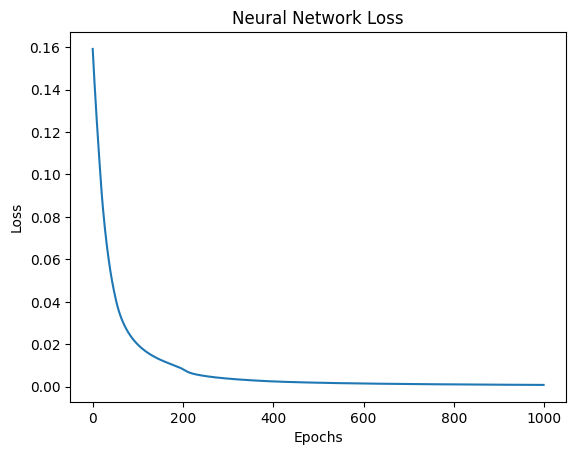

In [22]:
# TODO: Plot the losses of the neural network
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(lossArr)
ax.set_title("Neural Network Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

### Let's calculate the following predictions
* Calculate the neural network prediction for the input `[0.5, 8.7]` in the `output1` variable.
* Calculate the neural network prediction for the input `[15, -15]` in the `output2` variable.


In [23]:
# TODO: Calculate two predictions for given (x,y) points

# TODO: Calculate the prediction for the first input
test_X_nn = np.array([0.5, 8.7])
layer1_output = neuralNet.sigmoid(np.dot(test_X_nn, neuralNet.weights1))
output1 = neuralNet.sigmoid(np.dot(layer1_output, neuralNet.weights2))  # TODO: This value must be calculated.

# TODO: Calculate the prediction for the second input
test_X_nn2 = np.array([15, -15])
layer2_output = neuralNet.sigmoid(np.dot(test_X_nn2, neuralNet.weights1))
output2 = neuralNet.sigmoid(np.dot(layer2_output, neuralNet.weights2))

In [24]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
print(output1) # this would be 'BLUE' dot
print(output2) # this would be 'RED' dot

[0.9522308]
[0.03229496]


# Assignment 2-2
# Topic: Simple neural network with Keras Sequential API (max. 3 p)

Train a simple neural network with the **Keras** interface using *Titanic dataset*.

You can get the dataset from the URL: `https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv`

Steps that must be found in the assignment:
1. Choose only the most important features from the Titanic data
2. Create a neural network (use `tf.keras.Sequential()` method)
3. Define loss function and optimizer (use `model.compile()` method)
4. Train the neural network (use `model.fit()` method)
5. Compare the predictions given by the neural network with the test data (use the `model.evaluate()` method)
6. Print the results of the epochs to the console.
7. Change the structure of the neural network and try to document the neural network with which you got the best results.
* 500 - 1000 learning rounds (epochs) are certainly enough for this neural network.

Example output:
```
23/23 [==============================] - 0s 687us/step - loss: 2.2182 - accuracy: 0.6236
Epoch 2/1000
23/23 [==============================] - 0s 702us/step - loss: 1.4468 - accuracy: 0.6238
```

Note! It's worth trying several neural network structures and comparing the learning results a little.


### Data preprocessing + Keras - Titanic dataset

A version that aims to retrieve the most important features that are most correlated with the `survived` field (class variable).


In [25]:
# TODO: Implementation of the task
# TODO: Implement Data Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta10/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# choose important features
important_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']

df = df[important_features]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [27]:
# use label encoding for 'male' and 'female' feature values.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,3,1,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,S,0
887,1,1,19.0,0,0,30.0000,S,1
888,3,1,NaN,1,2,23.4500,S,0
889,1,0,26.0,0,0,30.0000,C,1


In [28]:
# Find all nan values
nan_colum = df.isna().sum()
print(nan_colum)

# Fill missing age with the median age of corresponding groups 'Pclass' and 'Sex' that could have strong correlation to actual age. 
# 177 nan values is too much to simply use the median of the 'Age' Column
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Drop the 2 rows including 'nan' values in 'Embarked' column
df = df.dropna(subset=['Embarked'])
df

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,3,1,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,3,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,S,0
887,1,1,19.0,0,0,30.0000,S,1
888,3,1,21.5,1,2,23.4500,S,0
889,1,0,26.0,0,0,30.0000,C,1


In [29]:
# implement one-hot encoding for the 'Embarked' column as it is non-ordinal data with no distinct relationship with other key features.
embarked_dummis = pd.get_dummies(df['Embarked'], prefix='Embarked').astype(int)
df = pd.concat([df, embarked_dummis], axis=1)
df = df.drop('Embarked', axis=1)

print(df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Survived  Embarked_C  Embarked_Q  \
0       3    0  22.0      1      0   7.2500         0           0           0   
1       1    1  38.0      1      0  71.2833         1           1           0   
2       3    1  26.0      0      0   7.9250         1           0           0   
3       1    1  35.0      1      0  53.1000         1           0           0   
4       3    0  35.0      0      0   8.0500         0           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


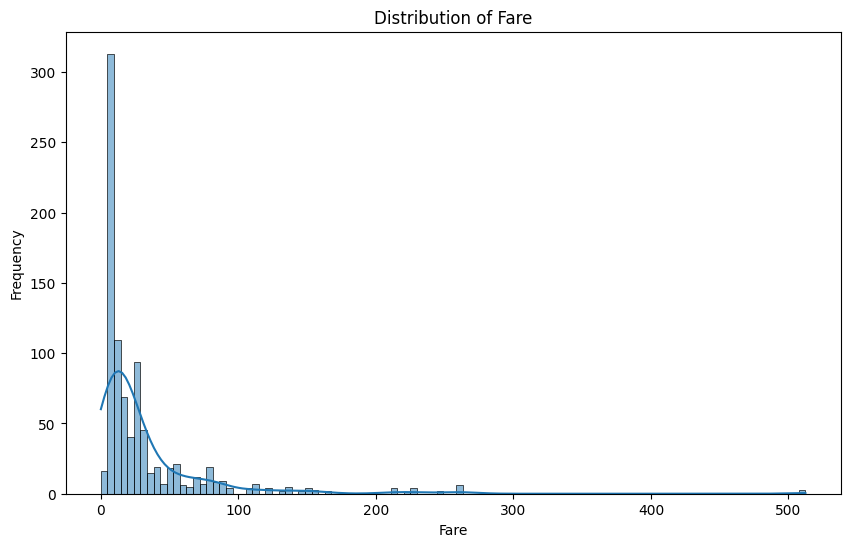

In [30]:
# Plotting the 'Fare' feature to find outliers as it's the only feature with highly scaling values
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [31]:
# scaling the numerical features with normalization due to low amount of outliers in 'Fare' values.
scaler = MinMaxScaler()
columns_to_scale = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

# Data is now preprocessed!

   Pclass  Sex       Age  SibSp  Parch      Fare  Survived  Embarked_C  \
0     1.0    0  0.271174  0.125    0.0  0.014151         0           0   
1     0.0    1  0.472229  0.125    0.0  0.139136         1           1   
2     1.0    1  0.321438  0.000    0.0  0.015469         1           0   
3     0.0    1  0.434531  0.125    0.0  0.103644         1           0   
4     1.0    0  0.434531  0.000    0.0  0.015713         0           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


If you get *"SSL certificate expired error"*, the above code will help.

Another alternative is to just copy the CSV file to your own local repository to do the assignment.

In [32]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# df = pd.read_csv(...)

### Splitting the Data
* Extract the class variable from the data.
* Divide the data into training and test data.


In [33]:
# Implementation of the task

# TODO: Extract the class variable from the data
# TODO: Split into training and test data

from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)

print(len(X_train))
print(len(y_train))

666
666


### Implementation of the task using the Keras library

Create a neural network with `Dense` layers one after the other (`Sequential`). Specify these two parameters at least:
* `units` – dimensionality of the output space.
* `activation` – Activation function to use.

Creating a neural network based on `Sequential` class.

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(neurons, activation='relu'), ...
          # Define Layers in between (one or more hidden layers)
          # In the output layer there is only one neuron (i.e. Survived, the output value is between 0-1)

Note! It is worth trying several neural network structures and comparing the learning results of them.

In [34]:
# THIS IS MY OWN ATTEMPT TO MAKE THE MODEL BETTER USING LOOPING TO FIND BEST HYPERPARAMETERS AND METHODS


import tensorflow as tf

tf.keras.backend.set_floatx('float64')

# After all manual labor to change the hyperparameters and methods, 
# I decided to try looping through hyperparameters and optimizers to find the best values:

number_of_features = 9
neurons_range = [32, 64, 128]
learning_rates = [0.001,0.01,0.1]
batch_sizes = [16, 32, 64]
optimizers = {
    'SGD': tf.keras.optimizers.SGD,
    'RMSprop': tf.keras.optimizers.RMSprop,
    'Adam': tf.keras.optimizers.Adam
}
activation_functions = ['relu', 'tanh']
momentum_values = [0.9, 0.95, 0.99]
epsilon_values = [1e-7, 1e-8, 1e-9]
regularization_values = [0.01, 0.001, 0.0001, 0]

current_iter = 0 # keep track of the current iteration 

# count the amount of total iterations needed
total_iterations = (len(neurons_range) *
                     len(learning_rates) *
                     len(batch_sizes) *
                     len(activation_functions) *
                     len(regularization_values) *
                     (len(momentum_values) + (len(epsilon_values))))

def create_sgd_optimizer(learning_rate, momentum):
    return tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

def create_adam_optimizer(learning_rate, epsilon):
    return tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=epsilon)

def create_rmsprop_optimizer(learning_rate):
    return tf.keras.optimizers.RMSprop(learning_rate=learning_rate)


def create_model(neurons, learning_rate, optimizer, activation, regularization):
    model = tf.keras.Sequential([
        # input layer
        tf.keras.layers.Dense(
            units=neurons,
            activation=activation,
            input_shape=(number_of_features,),
            kernel_regularizer=tf.keras.regularizers.l2(regularization)),
        # hidden layer
        tf.keras.layers.Dense(units=neurons // 2,
                              activation=activation),
        #output layer
        tf.keras.layers.Dense(units=1,
                              activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

best_accuracy = 0
loss = 0
best_params = {}
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def update_best_model(accuracy, loss, opt_name, lr, batch_size, neurons, opt_param1, regularization, activation):
    global best_accuracy, best_params
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'optimizer': opt_name,
            'learning_rate': lr,
            'batch_size': batch_size,
            'neurons': neurons,
            'optimizer_param_1': opt_param1,
            'regularization': regularization,
            'activation': activation,
            'loss': loss
        }

for neurons in neurons_range:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for activation in activation_functions:
                for regularization in regularization_values:
                    activation_fn = activation

                    # SGD Optimizer Loop
                    for momentum in momentum_values:
                        current_iter += 1
                        #print(f"Iterations: {total_iterations - current_iter}")
                        optimizer_sgd = create_sgd_optimizer(lr, momentum)
                        model = create_model(neurons, lr, optimizer_sgd, activation_fn, regularization)
                        model.fit(X_train, y_train, epochs=125, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)
                        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                        update_best_model(accuracy, loss, 'SGD', lr, batch_size, neurons, momentum, regularization, activation)

                    # Adam Optimizer Loop
                    for epsilon in epsilon_values:
                        current_iter += 1
                        #print(f"Iterations: {total_iterations - current_iter}")
                        optimizer_adam = create_adam_optimizer(lr, epsilon)
                        model = create_model(neurons, lr, optimizer_adam, activation_fn, regularization)
                        model.fit(X_train, y_train, epochs=125, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)
                        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                        update_best_model(accuracy, loss, 'Adam', lr, batch_size, neurons, epsilon, regularization, activation)

                    # RMSprop Optimizer Loop
                    current_iter += 1
                    #print(f"Iterations: {total_iterations - current_iter}")
                    optimizer_rmsprop = create_rmsprop_optimizer(lr)
                    model = create_model(neurons, lr, optimizer_rmsprop, activation_fn, regularization)
                    model.fit(X_train, y_train, epochs=125, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)
                    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                    update_best_model(accuracy, loss, 'RMSprop', lr, batch_size, neurons, 'N/A', regularization, activation)


# Find the best params
print(f"Best model: {best_params} with accuracy {best_accuracy} and loss {loss}")


Best model: {'optimizer': 'SGD', 'learning_rate': 0.001, 'batch_size': 16, 'neurons': 32, 'optimizer_param_1': 0.9, 'regularization': 0, 'activation': 'relu', 'loss': 0.4128162005939534} with accuracy 0.8475336322869955 and loss 0.6650891016509763


Next steps in the task are:

* Compile the model (`model.compile()`)
* Train the neural network with *n epoch* rounds (`model.fit()`)
* Compare the obtained learning results with the test data (`model.evaluate()`)
* define loss function: `loss='binary_crossentropy'`

Note! `verbose=1` is a good option in the fit()/evaluate() functions, which allows you to see how the teaching progresses by epoch cycles

In [35]:
# Implementation of the task

# TODO: Compile the model

# ACCORDING TO THE ABOVE HYPERPARAMETER LOOPING, the best setup for the model is:
# optimizer: 'SGD'
# learning rate: 0.001
# batch size: 16
# neurons 32
# SGD momentum: 0.9
# regularization: 0.001
# activation: relu

# implementing the model with above hyperparameters:

number_of_features = 9

model = tf.keras.Sequential([

    tf.keras.layers.Dense(units=64,
                          activation='relu',
                          input_shape=(number_of_features,),
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(units=32, activation='relu'),

    #tf.keras.layers.Dropout(rate=0.5), #dropout layer didn't improve performance
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(
    optimizer=sgd_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# TODO: Train the neural network with n epoch rounds
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping] # trying early stopping with 'val_loss' metric. Best 84% accuracy on test data.
)



Model: "sequential_1520"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4560 (Dense)          (None, 64)                640       
                                                                 
 dense_4561 (Dense)          (None, 32)                2080      
                                                                 
 dense_4562 (Dense)          (None, 32)                1056      
                                                                 
 dense_4563 (Dense)          (None, 16)                528       
                                                                 
 dense_4564 (Dense)          (None, 1)                 17        
                                                                 
Total params: 4321 (33.76 KB)
Trainable params: 4321 (33.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1000
34/34 [==============================] - 1s 4ms/step - loss: 0.6980 - accuracy: 0.6203 - val_loss: 0.6881 - val_accuracy: 0.5970
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6203 - val_loss: 0.6720 - val_accuracy: 0.5970
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6203 - val_loss: 0.6614 - val_accuracy: 0.5970
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6203 - val_loss: 0.6520 - val_accuracy: 0.5970
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.6203 - val_loss: 0.6428 - val_accuracy: 0.5970
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.6203 - val_loss: 0.6336 - val_accuracy: 0.5970
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6203 - val_loss: 0.6247 - val_accuracy: 0.5970
Epoch 

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# TODO: Compare the obtained learning results with the test data
results = [round(test_loss,2),
           round(test_accuracy,2)]  # TODO: Code is initialized so that there are no errors. Results will be calculated in this task.

7/7 - 0s - loss: 0.4167 - accuracy: 0.8206 - 21ms/epoch - 3ms/step


In [37]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the task. Set the result of the model.evaluate() function in the results variable.

# TODO: Be sure to set the model.compile() function to be tracked as metrics=['accuracy'] to define the accuracy of the neural network predictions.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1] * 100}%")

Test Loss:0.42 Test Accuracy:82.0%


About the modeling results:
* Test Accuracy: approx. 80% or greater is already pretty good
* You can try to get better results for improving your modeling skills


# ANALYSIS OF RESULTS

I need to write an analysis because I tried so many different things that it would go to waste without opening them up.

First, I trained the model with what was said on the course page and I got about 77% accuracy with test data. Then I started switching the optimizers and got the best result with SGD optimizer which was at some point like 84% with test data.
Then, there is one code block above that holds the looping of hyperparameters and optimizers to find the most optimum parameters there is. It had about 1500+ iterations with 7 nested loops and the results are visible in the document.
With these changes, I implemented the above model and got test accuracy of 83%, so not much difference there comparing to just switching to 'SGD' optimizer with a minimal set of hyperparameters.
I do still think that with what I did, the model is generally more accurate than it would be without the serious hyperparameter tuning.

Overall this assignment was very fun and educative to do and how resource expensive deep learning can be! It took 1,5 hours to complete the iterations of hyperparameters and it had only 1500+ iterations, which is insane! Either I need to get better CPU, utilize GPU or let the calculations do themselves in the middle of the night, because it is sick how long it takes to calculate these neural networks. Machine learning models are nothing compared to these.

Still very fun and I enjoyed the exercise alot!